# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime 
from datetime import date 
import pprint as pp
# Import API key
from config import api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
       
    
#Print the city count to confirm sufficient count
print(len(cities))
#print(cities)
cities_df=pd.DataFrame(cities)
cities_df.to_csv(output_data_file)
cities_df=cities_df.rename(columns={0:"City"})
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Long"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""





#del cities_df[0]

#cities_df["cities"][0]

595


In [21]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,yellowknife,,,,,,,,
1,praia,,,,,,,,
2,mataura,,,,,,,,
3,ruteng,,,,,,,,
4,menongue,,,,,,,,


In [22]:

temp = []
#str=query_url + cities_df["City"][0]
#city1="vaitupu"
#print(str)
#response = requests.get(query_url + city1).json()
#print(response)
#pp.pprint(response)

#print(response["name"])
#print(response["clouds"]["all"])
#print(response["sys"]["country"])
#print(response["dt"])
#print(response["main"]["humidity"])
#print(response["coord"]["lat"])
#print(response["coord"]["lon"])
#print(response["main"]["temp_max"])
#print(response["wind"]["speed"])
#print(response["main"]["pressure"])
ctycntr=1
setcnt =1
#print(response[""])
for index, row in cities_df.iterrows():
    city = row['City']
    
    if (ctycntr%50)==0:
        #print(ctycntr%50)
        ctycntr=1
        setcnt +=1
    else:
        ctycntr+=1 
    response = requests.get(query_url + city).json()
    print(f"Processing Record {ctycntr-1} of Set {setcnt} | {city} ")
    #print(query_url + city)
    if response["cod"]!="404" and response["cod"]!="500" :
        cities_df.loc[index, "Cloudiness"]=response["clouds"]["all"]
        #cities_df["Cloudiness"]=response["clouds"]["all"]
        cities_df.loc[index, "Country"]=response["sys"]["country"]
        #cities_df["Country"]=response["sys"]["country"]
        current_date=datetime.datetime.fromtimestamp(response["dt"]).strftime("%x")
        cities_df.loc[index, "Date"]=response["dt"]
        #cities_df["Date"]=response["dt"]
        cities_df.loc[index, "Humidity"]=response["main"]["humidity"]
        #cities_df["Humidity"]=response["main"]["humidity"]
        cities_df.loc[index, "Lat"]=float(response["coord"]["lat"])
        #cities_df["Lat"]=response["coord"]["lat"]
        cities_df.loc[index, "Long"]=response["coord"]["lon"]
        #cities_df["Long"]=response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]=float(response["main"]["temp_max"])
        #cities_df["Max Temp"]=response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"]=response["wind"]["speed"]
        #cities_df["Wind Speed"]=response["wind"]["speed"]
    else:
        print("City Not Found")
        
#Processing Record 1 of Set 1 | lompoc

 #   lat.append(response['coord']['lat'])
 #   temp.append(response['main']['temp'])

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")



Processing Record 1 of Set 1 | yellowknife 
Processing Record 2 of Set 1 | praia 
Processing Record 3 of Set 1 | mataura 
Processing Record 4 of Set 1 | ruteng 
Processing Record 5 of Set 1 | menongue 
Processing Record 6 of Set 1 | dunmore east 
Processing Record 7 of Set 1 | trairi 
Processing Record 8 of Set 1 | qianan 
Processing Record 9 of Set 1 | khatanga 
Processing Record 10 of Set 1 | porto novo 
Processing Record 11 of Set 1 | san quintin 
Processing Record 12 of Set 1 | carnarvon 
Processing Record 13 of Set 1 | inawashiro 
Processing Record 14 of Set 1 | mar del plata 
Processing Record 15 of Set 1 | leningradskiy 
Processing Record 16 of Set 1 | bredasdorp 
Processing Record 17 of Set 1 | punta arenas 
Processing Record 18 of Set 1 | tabiauea 
City Not Found
Processing Record 19 of Set 1 | ushuaia 
Processing Record 20 of Set 1 | victoria 
Processing Record 21 of Set 1 | hellin 
Processing Record 22 of Set 1 | hobart 
Processing Record 23 of Set 1 | aras 
Processing Recor

Processing Record 41 of Set 4 | maghama 
City Not Found
Processing Record 42 of Set 4 | lompoc 
Processing Record 43 of Set 4 | lieksa 
Processing Record 44 of Set 4 | coquimbo 
Processing Record 45 of Set 4 | lipari 
Processing Record 46 of Set 4 | salalah 
Processing Record 47 of Set 4 | araouane 
Processing Record 48 of Set 4 | georgetown 
Processing Record 49 of Set 4 | arman 
Processing Record 0 of Set 5 | avarua 
Processing Record 1 of Set 5 | oktyabrskiy 
Processing Record 2 of Set 5 | greenwood 
Processing Record 3 of Set 5 | faanui 
Processing Record 4 of Set 5 | bridlington 
Processing Record 5 of Set 5 | bourg-en-bresse 
Processing Record 6 of Set 5 | zabid 
Processing Record 7 of Set 5 | clyde river 
Processing Record 8 of Set 5 | ambodifototra 
City Not Found
Processing Record 9 of Set 5 | aswan 
Processing Record 10 of Set 5 | gat 
Processing Record 11 of Set 5 | alice springs 
Processing Record 12 of Set 5 | comodoro rivadavia 
Processing Record 13 of Set 5 | port hardy 

Processing Record 28 of Set 8 | eureka 
Processing Record 29 of Set 8 | quatre cocos 
Processing Record 30 of Set 8 | bolungarvik 
City Not Found
Processing Record 31 of Set 8 | da nang 
City Not Found
Processing Record 32 of Set 8 | caravelas 
Processing Record 33 of Set 8 | ancud 
Processing Record 34 of Set 8 | kirishi 
Processing Record 35 of Set 8 | ramona 
Processing Record 36 of Set 8 | shizilu 
Processing Record 37 of Set 8 | oksfjord 
Processing Record 38 of Set 8 | powassan 
Processing Record 39 of Set 8 | tambopata 
City Not Found
Processing Record 40 of Set 8 | hasaki 
Processing Record 41 of Set 8 | vostok 
Processing Record 42 of Set 8 | nemuro 
Processing Record 43 of Set 8 | ayios matthaios 
City Not Found
Processing Record 44 of Set 8 | komsomolskiy 
Processing Record 45 of Set 8 | narsaq 
Processing Record 46 of Set 8 | puri 
Processing Record 47 of Set 8 | dobrinka 
Processing Record 48 of Set 8 | srednekolymsk 
Processing Record 49 of Set 8 | skjervoy 
Processing Re

Processing Record 16 of Set 12 | nyuksenitsa 
Processing Record 17 of Set 12 | pandamatenga 
Processing Record 18 of Set 12 | falun 
Processing Record 19 of Set 12 | sungurlu 
Processing Record 20 of Set 12 | deputatskiy 
Processing Record 21 of Set 12 | erzin 
Processing Record 22 of Set 12 | yarada 
Processing Record 23 of Set 12 | vanimo 
Processing Record 24 of Set 12 | esso 
Processing Record 25 of Set 12 | piacabucu 
Processing Record 26 of Set 12 | valdosta 
Processing Record 27 of Set 12 | carballo 
Processing Record 28 of Set 12 | bria 
Processing Record 29 of Set 12 | himi 
Processing Record 30 of Set 12 | ocos 
Processing Record 31 of Set 12 | nuevo progreso 
Processing Record 32 of Set 12 | saint-ambroise 
Processing Record 33 of Set 12 | vila franca do campo 
Processing Record 34 of Set 12 | tautira 
Processing Record 35 of Set 12 | amberley 
Processing Record 36 of Set 12 | abu samrah 
Processing Record 37 of Set 12 | leshukonskoye 
Processing Record 38 of Set 12 | kiama 

In [23]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,yellowknife,90,CA,1545415200,92,62.45,-114.38,10.4,2.24
1,praia,40,BR,1545415200,57,-20.25,-43.81,80.6,5.82
2,mataura,92,NZ,1545418081,100,-46.19,168.86,48.46,4.41
3,ruteng,12,ID,1545418081,88,-8.61,120.46,70.6,4.07
4,menongue,36,AO,1545418081,96,-14.66,17.68,65.78,2.28


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
cities_df.to_csv("cities_fullframe.csv")
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,yellowknife,90,CA,1545415200,92,62.45,-114.38,10.4,2.24
1,praia,40,BR,1545415200,57,-20.25,-43.81,80.6,5.82
2,mataura,92,NZ,1545418081,100,-46.19,168.86,48.46,4.41
3,ruteng,12,ID,1545418081,88,-8.61,120.46,70.6,4.07
4,menongue,36,AO,1545418081,96,-14.66,17.68,65.78,2.28


In [25]:
cities_df["Lat"]=pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"]=pd.to_numeric(cities_df["Max Temp"])
cities_df["Humidity"]=pd.to_numeric(cities_df["Humidity"])
cities_df["Wind Speed"]=pd.to_numeric(cities_df["Wind Speed"])
cities_df["Cloudiness"]=pd.to_numeric(cities_df["Cloudiness"])
ymax=cities_df["Max Temp"].max()+10
ymin=cities_df["Max Temp"].min()-10
xmax=cities_df["Lat"].max()+10
xmin=cities_df["Lat"].min()+10



#cities_df["Date"]=pd.to_float(cities_df["Date"])
#cities_df["Date"]=
#print(time.ctime(cities_df["Date"]))
#print(datetime.datetime.fromtimestamp(date.now()).strftime("%x"))
#print(datetime.datetime(cities_df["Date"].year, cities_df["Date"].month, cities_df["Date"].day))
#print(datetime.datetime.fromtimestamp((cities_df["Date"])))

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

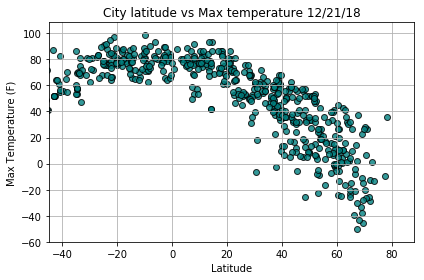

In [26]:
#plt.figure(figsize=(8,8))
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City latitude vs Max temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Max Temp"],marker="o", alpha=.8,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
plt.tight_layout()

plt.savefig("latitude_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

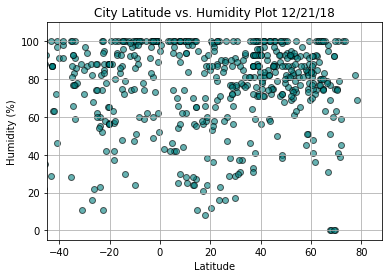

In [27]:
#plt.figure(figsize=(10,8))
ymax=100+10
ymin=cities_df["Humidity"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Humidity Plot {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Humidity"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
#plt.tight_layout()

plt.savefig("latitude_Humidty.png")
plt.show()

#### Latitude vs. Cloudiness Plot

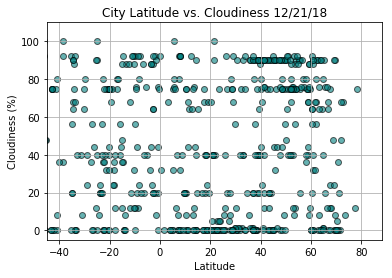

In [28]:
#plt.figure(figsize=(10,8))
ymax=cities_df["Cloudiness"].max()+10
ymin=cities_df["Cloudiness"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(cities_df["Lat"], cities_df["Cloudiness"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
#plt.tight_layout()

plt.savefig("latitude_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

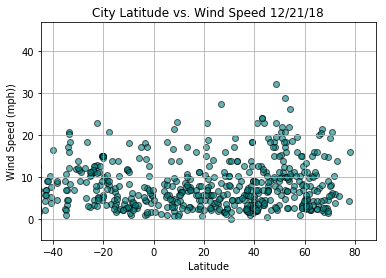

In [29]:
#plt.figure(figsize=(10,8))
ymax=cities_df["Wind Speed"].max()+10
ymin=cities_df["Wind Speed"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")

plt.scatter(cities_df["Lat"], cities_df["Wind Speed"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")

plt.grid()
#plt.tight_layout()


plt.savefig("latitude_Wind_Speed.png")
plt.show()